In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
Toyota = pd.read_csv("ToyotaCorolla.csv", encoding= 'unicode_escape')

In [3]:
Toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
Corolla = Toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [5]:
Corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

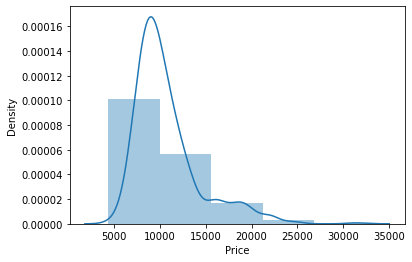

In [6]:
sns.distplot(Corolla['Price'],bins=5,kde=True)

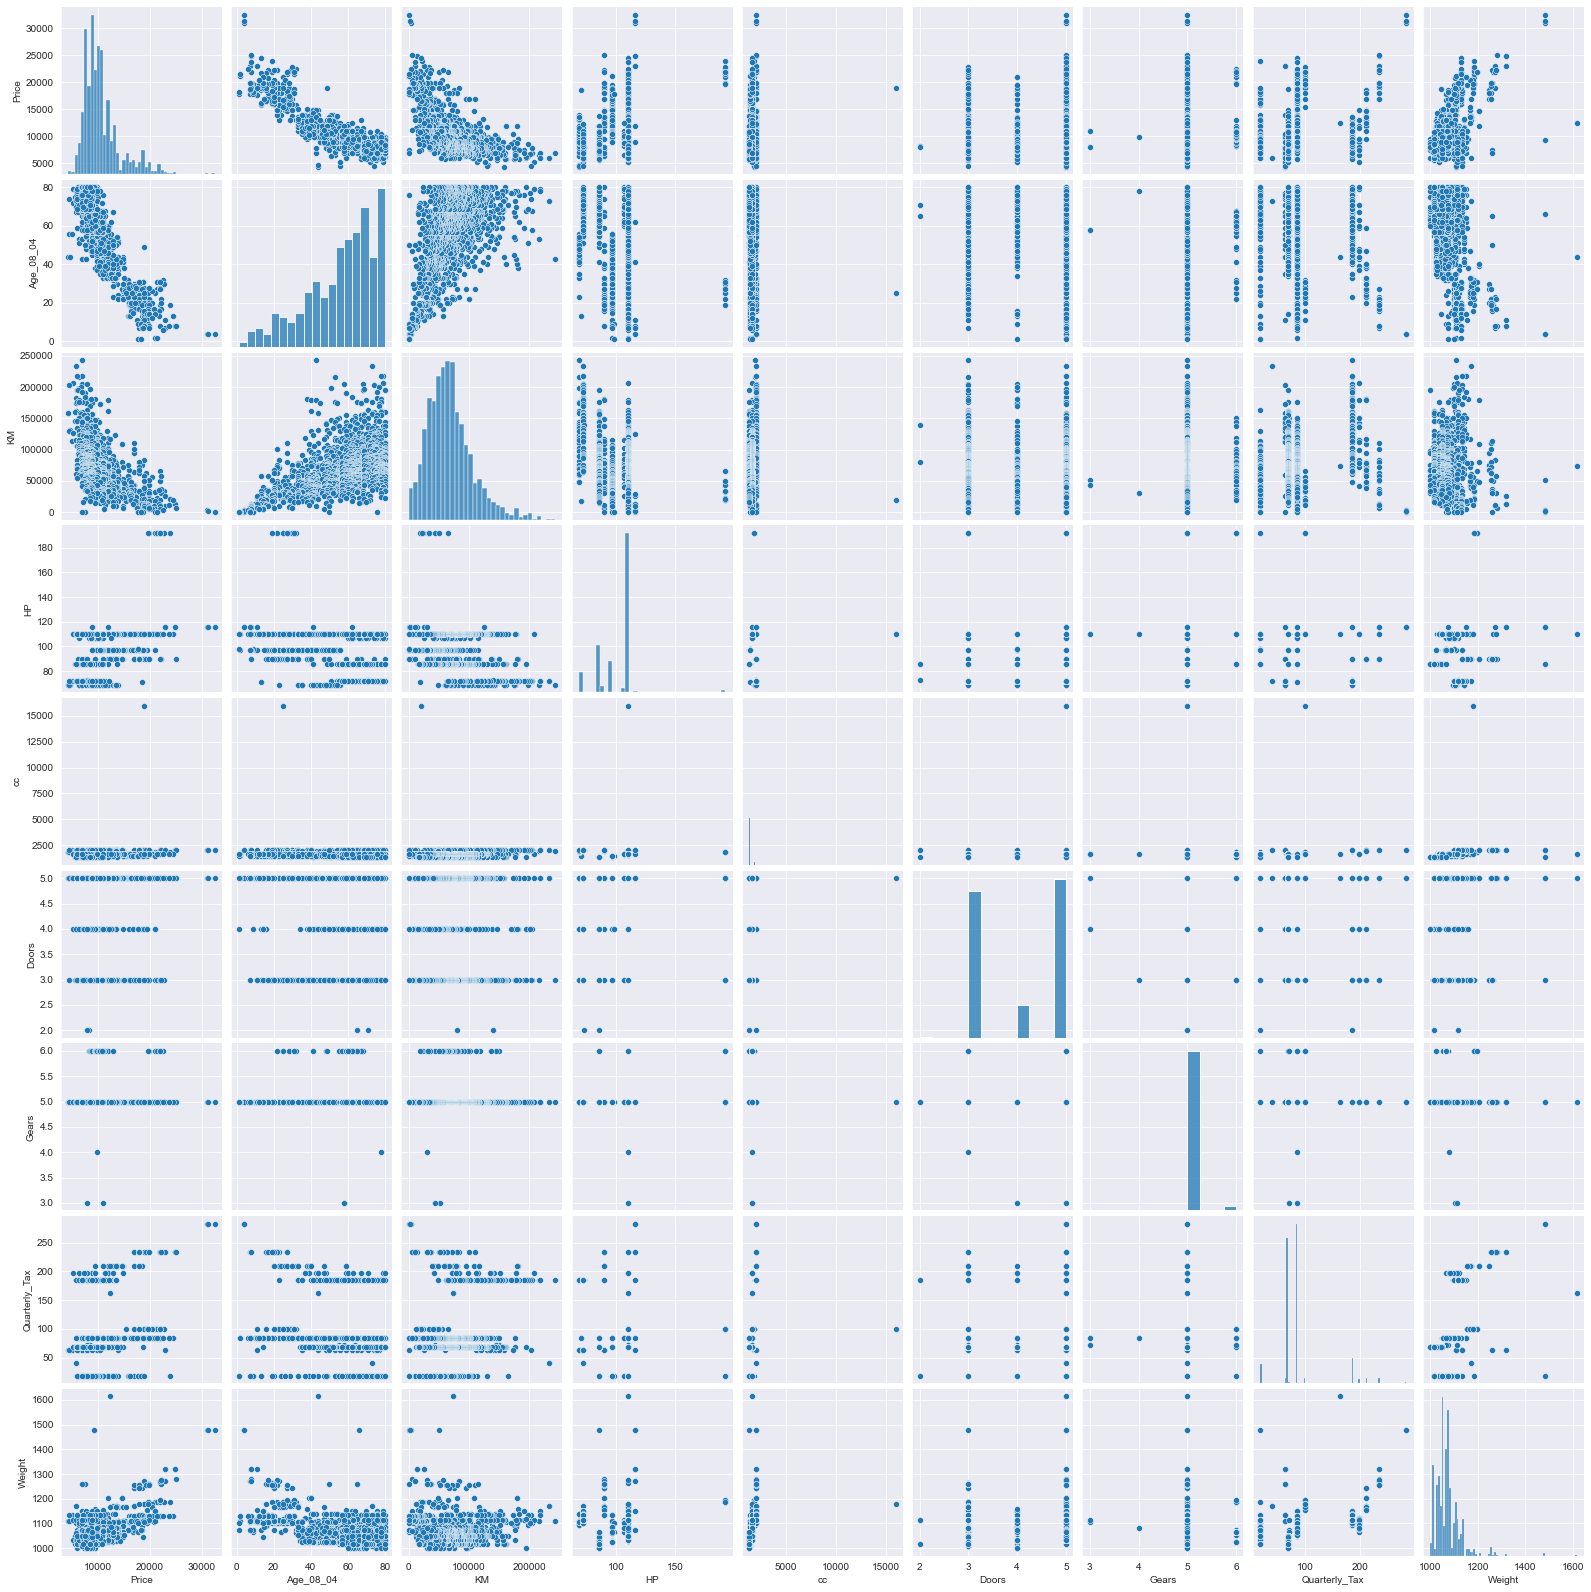

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(Corolla)

In [8]:
Corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [9]:
#Build model 1
import statsmodels.formula.api as smf 
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit()

In [10]:
model1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [11]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [12]:
#R squared values and AIC
(model1.rsquared,model1.rsquared_adj,model1.aic)

(0.8637627463428191, 0.8629989775766962, 24769.07664007625)

In [13]:
ml_cc=smf.ols('Price~cc',data = Corolla).fit()  
#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues)  

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [14]:
ml_d=smf.ols('Price~Doors',data = Corolla).fit()  
#t and p-Values
print(ml_d.tvalues, '\n', ml_d.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [15]:
ml_cc_d=smf.ols('Price~cc+Doors',data = Corolla).fit()  
#t and p-Values
print(ml_cc_d.tvalues, '\n', ml_cc_d.pvalues)  

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


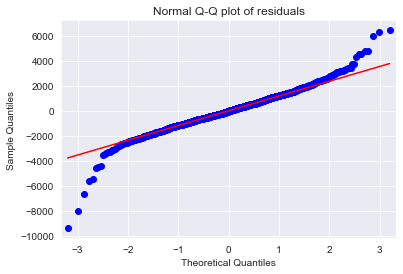

In [16]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [17]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

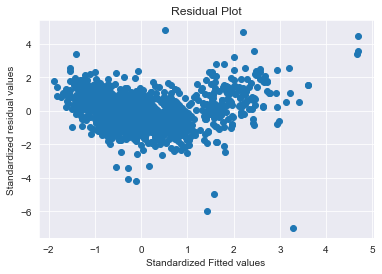

In [18]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

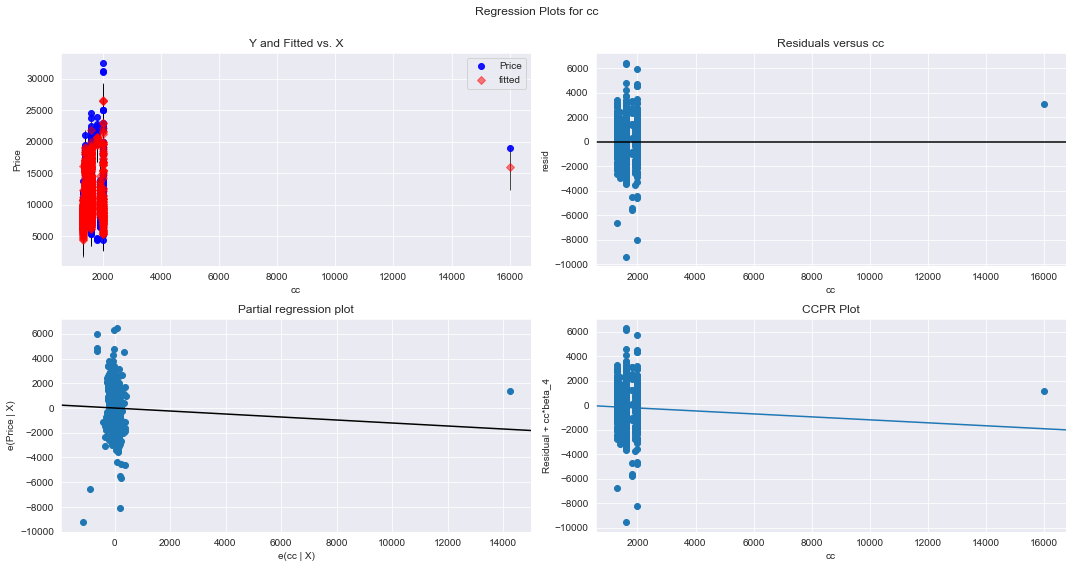

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "cc", fig=fig)
plt.show()

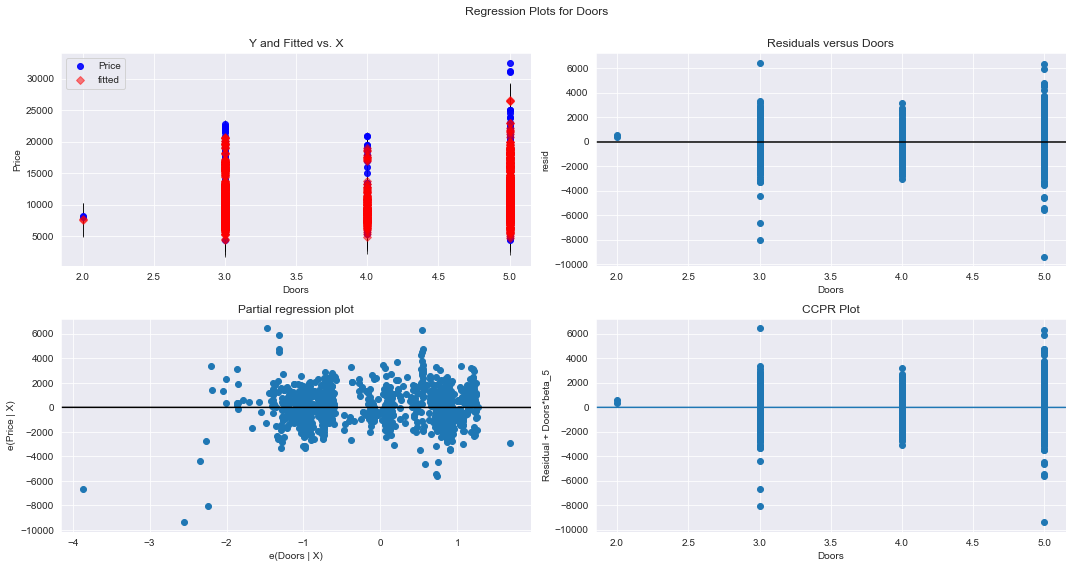

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Doors", fig=fig)
plt.show()

In [21]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

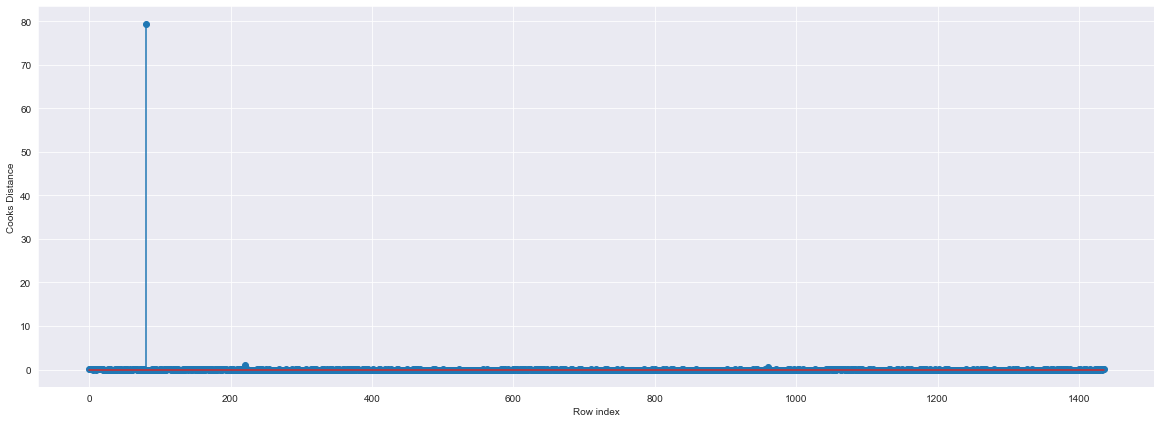

In [22]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [23]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624137654)

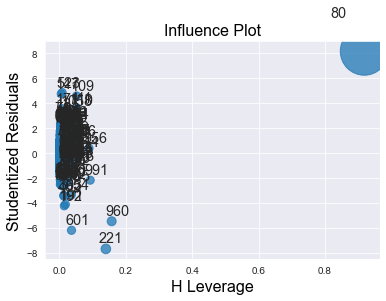

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [25]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Corolla1=Corolla.drop(Corolla.index[[80]],axis=0).reset_index()

In [26]:
#Build model 2
import statsmodels.formula.api as smf 
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Corolla1).fit()

In [27]:
model2.params

Intercept       -6313.939621
Age_08_04        -120.457695
KM                 -0.017894
HP                 39.159255
cc                 -2.506874
Gears             549.731101
Quarterly_Tax       9.075930
Weight             19.962273
dtype: float64

In [28]:
#t and p-Values
print(model2.tvalues, '\n', model2.pvalues)

Intercept        -4.569171
Age_08_04       -47.030954
KM              -14.028891
HP               13.511750
cc               -8.188083
Gears             2.905316
Quarterly_Tax     6.374453
Weight           18.547098
dtype: float64 
 Intercept         5.319061e-06
Age_08_04        2.296010e-292
KM                5.564084e-42
HP                3.086498e-39
cc                5.827586e-16
Gears             3.725373e-03
Quarterly_Tax     2.473062e-10
Weight            5.723957e-69
dtype: float64


In [29]:
#R squared values and AIC
(model2.rsquared,model2.rsquared_adj,model2.aic)

(0.8693349475698541, 0.8686939837527475, 24685.765438793034)

In [30]:
Corolla2 = Corolla1[['Price','Age_08_04','KM','HP','cc','Gears','Quarterly_Tax','Weight']]

In [31]:
X = Corolla2.iloc[:,1:].values #Independent Values

In [32]:
y = Corolla2.iloc[:,0].values #Dependent Value

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [34]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = model3.predict(X_test)

In [36]:
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
df

,Actual Values,Predicted Values
0,9450,10810.590465
1,10495,8760.652429
2,10950,11416.680667
3,11950,11314.637925
4,8250,7506.363023
...,...,...
282,7350,7878.435083
283,13250,14381.827568
284,5150,8938.196798
285,9500,9874.176307


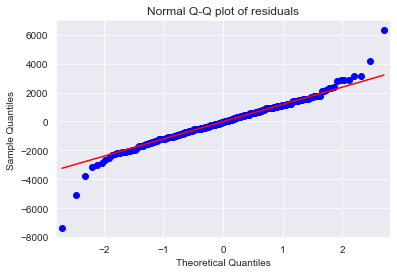

In [37]:
import statsmodels.api as sm
qqplot=sm.qqplot((y_test-y_pred),line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

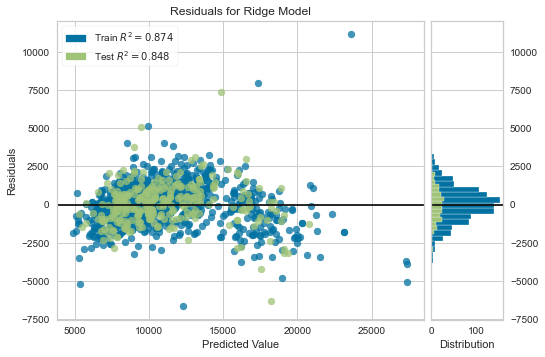

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [38]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

vis = Ridge()
visualizer = ResidualsPlot(vis)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure